In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

df = pd.read_csv('Dataframes/3rdBodyPerturbationPoliastro.csv')

df

,x,y,z
0,42159.783600,0.000000,0.000000
1,39159.545914,15563.916303,266.913399
2,30572.229294,28909.053086,496.928223
3,17596.068412,38144.740319,671.356184
4,2068.446366,41949.706443,775.646554
...,...,...,...
995,38132.961517,21370.880108,-7532.333000
996,31399.515894,31233.289707,1828.575655
997,20906.077447,37238.565267,10967.804062
998,7871.245318,38575.122415,18731.818721


Now we want to predict X values (can change for Y, Z):

In [2]:
#Create a new dataframe with only the x column
data = df.filter(['x']) # CHANGE FOR Y,Z

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

training_data_len

800

In [3]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.96495741],
       [0.86465808],
       [0.71309733],
       [0.53173566],
       [0.34651968],
       [0.18377842],
       [0.06588722],
       [0.00799281],
       [0.01656767],
       [0.08955821],
       [0.21731751],
       [0.38368148],
       [0.56718212],
       [0.74295892],
       [0.88596776],
       [0.97522611],
       [0.99768431],
       [0.95029358],
       [0.84001636],
       [0.68247793],
       [0.49980755],
       [0.31769906],
       [0.16167278],
       [0.05308586],
       [0.00595372],
       [0.02546109],
       [0.10813988],
       [0.24301494],
       [0.41295813],
       [0.59608049],
       [0.76761126],
       [0.90295758],
       [0.98194243],
       [0.99283942],
       [0.93445283],
       [0.81568654],
       [0.65357007],
       [0.47069303],
       [0.29232301],
       [0.1430616 ],
       [0.04324697],
       [0.0059099 ],
       [0.03517262],
       [0.12636918],
       [0.26731941],
       [0.43997815],
       [0.622

In [4]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 0.96495741, 0.86465808, 0.71309733, 0.53173566,
       0.34651968, 0.18377842, 0.06588722, 0.00799281, 0.01656767,
       0.08955821, 0.21731751, 0.38368148, 0.56718212, 0.74295892,
       0.88596776, 0.97522611, 0.99768431, 0.95029358, 0.84001636,
       0.68247793, 0.49980755, 0.31769906, 0.16167278, 0.05308586,
       0.00595372, 0.02546109, 0.10813988, 0.24301494, 0.41295813,
       0.59608049, 0.76761126, 0.90295758, 0.98194243, 0.99283942,
       0.93445283, 0.81568654, 0.65357007, 0.47069303, 0.29232301,
       0.1430616 , 0.04324697, 0.0059099 , 0.03517262, 0.12636918,
       0.26731941, 0.43997815, 0.62206839, 0.78900726, 0.91681136,
       0.98618743, 0.98664459, 0.91859847, 0.79264352, 0.62700685,
       0.44460536, 0.27019796, 0.12742846, 0.03565523, 0.00707249])]
[0.044980352806550716]

[array([1.        , 0.96495741, 0.86465808, 0.71309733, 0.53173566,
       0.34651968, 0.18377842, 0.06588722, 0.00799281, 0.01656767,
       0.08955821, 0.21731751, 0.3

In [5]:
x_train.shape

(740, 60, 1)

Model 1:

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
# Note: replace LSTM with GRU or RNN if you want to try those
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1))) # input_shape = (60,1)
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
47/47 [==============================] - 2s 43ms/step - loss: 0.1183: 0s - loss: 0.12
Epoch 2/10
47/47 [==============================] - 2s 42ms/step - loss: 0.0033
Epoch 3/10
47/47 [==============================] - 2s 42ms/step - loss: 6.0334e-04
Epoch 4/10
47/47 [==============================] - 2s 41ms/step - loss: 4.3957e-04: 0s - loss: 4.53
Epoch 5/10
47/47 [==============================] - 2s 40ms/step - loss: 3.5137e-04
Epoch 6/10
47/47 [==============================] - 2s 38ms/step - loss: 3.1661e-04
Epoch 7/10
47/47 [==============================] - 2s 41ms/step - loss: 2.6417e-04
Epoch 8/10
47/47 [==============================] - 2s 41ms/step - loss: 2.9768e-04
Epoch 9/10
47/47 [==============================] - 2s 41ms/step - loss: 2.2268e-04
Epoch 10/10
47/47 [==============================] - 2s 40ms/step - loss: 1.9795e-04


Model 2:

In [7]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

800.6676332260441

**How to write output DATAFRAME:**

In [8]:
pred=np.reshape(predictions, (predictions.shape[0]))
pred.shape

(200,)

In [9]:
pred_s=pd.Series(pred)
pred_s

0     -38382.140625
1     -36835.929688
2     -30257.126953
3     -19605.953125
4      -6305.816406
           ...     
195    39788.097656
196    32247.396484
197    20645.132812
198     6655.139648
199    -7799.833984
Length: 200, dtype: float32

In [10]:
df_pred= pd.DataFrame(columns=['x', 'y', 'z', 'x_vv', 'y_vv', 'z_vv'])
df_pred['x']=pred_s
df_pred

,x,y,z,x_vv,y_vv,z_vv
0,-38382.140625,NaN,NaN,NaN,NaN,NaN
1,-36835.929688,NaN,NaN,NaN,NaN,NaN
2,-30257.126953,NaN,NaN,NaN,NaN,NaN
3,-19605.953125,NaN,NaN,NaN,NaN,NaN
4,-6305.816406,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
195,39788.097656,NaN,NaN,NaN,NaN,NaN
196,32247.396484,NaN,NaN,NaN,NaN,NaN
197,20645.132812,NaN,NaN,NaN,NaN,NaN
198,6655.139648,NaN,NaN,NaN,NaN,NaN


In [11]:
x_test.shape

(200, 60, 1)

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


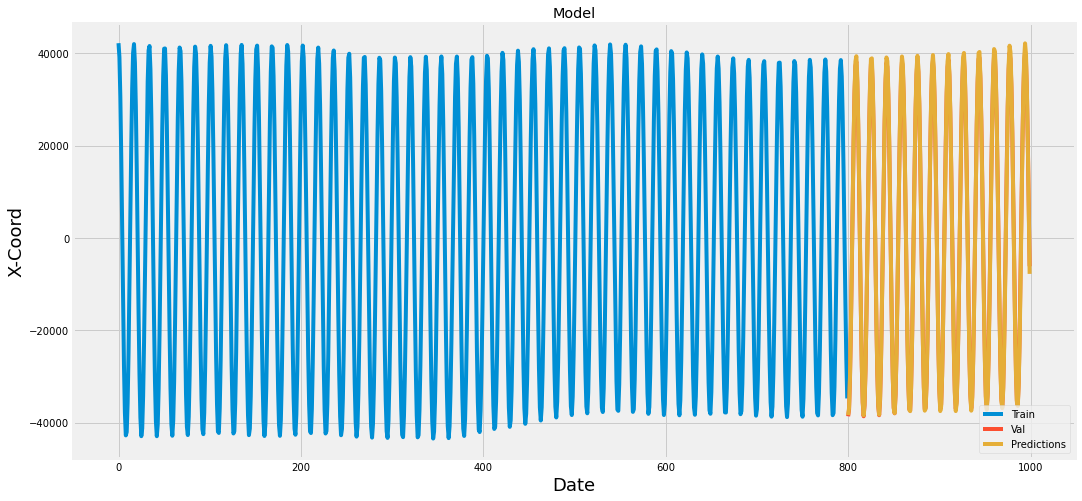

In [12]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('X-Coord', fontsize=18)
plt.plot(train['x'])
plt.plot(valid[['x', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Errors:

In [13]:
valid['Error']=abs(valid.Predictions-valid.x)/6738 # the normalization ct is taken as ISS semi-major axis

C:\Users\Vlad\anaconda3\envs\poliastro\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

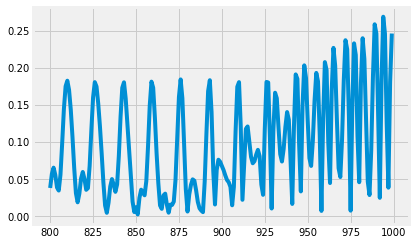

In [14]:
valid.Error.plot()